In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
%matplotlib inline

In [2]:
data=pd.read_csv("CC General.csv")
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [3]:
data[data.columns[0]].isnull().value_counts()

False    8950
Name: CUST_ID, dtype: int64

In [4]:
data.rename(columns={data.columns[0]:'cust_id'}).head()

,cust_id,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [5]:
total = data.isnull().sum(axis=0).sort_values(ascending=False)
percent = ((data.isnull().sum(axis=0)/data.isnull().count(axis=0))*100).sort_values(ascending=False)

# count the number of null values in the column and their perecentage of the total data
missing_data_columns = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data_columns.head(20)

,Total,Percent
MINIMUM_PAYMENTS,313,3.497207
CREDIT_LIMIT,1,0.011173
TENURE,0,0.000000
PURCHASES_FREQUENCY,0,0.000000
BALANCE,0,0.000000
BALANCE_FREQUENCY,0,0.000000
PURCHASES,0,0.000000
ONEOFF_PURCHASES,0,0.000000
INSTALLMENTS_PURCHASES,0,0.000000
CASH_ADVANCE,0,0.000000


In [15]:
#Imputing missing values
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer(missing_values=np.nan, strategy='median')
imp_mean.fit(data[['MINIMUM_PAYMENTS']])
data['MINIMUM_PAYMENTS'] = imp_mean.transform(data[['MINIMUM_PAYMENTS']])

In [16]:
data.drop(5203,axis=0,inplace=True) #dropping a missing value

In [17]:
data.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

Outlier Treatment

In [18]:
q1=data.quantile(0.25)
q3=data.quantile(0.75)
iqr=q3-q1
ll=q1-(1.5*iqr)
ul=q3+(1.5*iqr)

In [19]:
num=list()
for a in data.columns:
    if a in ll.index:
        num.append(a)

In [20]:
data=data[num]

In [21]:
df = data[~((data < (q1 - 1.5 * iqr)) |(data > (q3 + 1.5 * iqr))).any(axis=1)]

In [22]:
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.00000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.0,12
4,817.714335,1.000000,16.00,16.00,0.0,0.00000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.0,12
7,1823.652743,1.000000,436.20,0.00,436.2,0.00000,1.000000,0.000000,1.000000,0.000000,0,12,2300.0,679.065082,532.033990,0.0,12
8,1014.926473,1.000000,861.49,661.49,200.0,0.00000,0.333333,0.083333,0.250000,0.000000,0,5,7000.0,688.278568,311.963409,0.0,12
14,2772.772734,1.000000,0.00,0.00,0.0,346.81139,0.000000,0.000000,0.000000,0.083333,1,0,3000.0,805.647974,989.962866,0.0,12


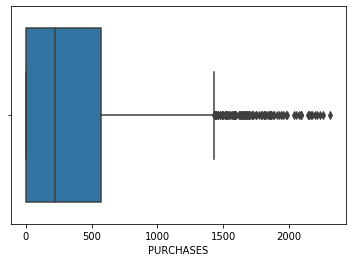

In [23]:
# plt.figure(figsize=(20,10))
sns.boxplot(df['PURCHASES']) #Total purchase amount spent during last 12 months

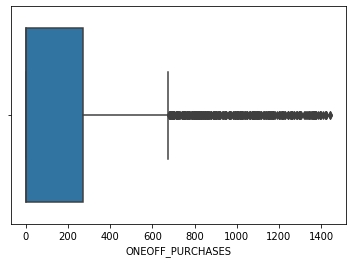

In [24]:
# plt.figure(figsize=(20,10))
sns.boxplot(df['ONEOFF_PURCHASES'])

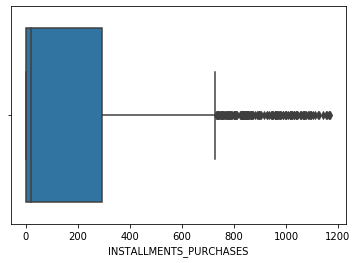

In [25]:
sns.boxplot(df['INSTALLMENTS_PURCHASES'])

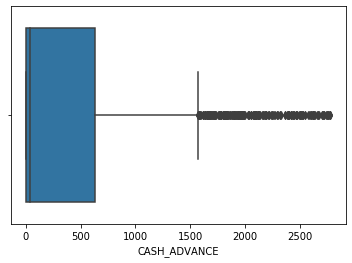

In [26]:
sns.boxplot(df['CASH_ADVANCE'])

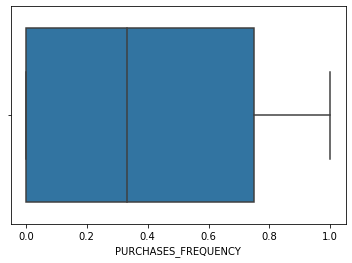

In [27]:
sns.boxplot(df['PURCHASES_FREQUENCY'])

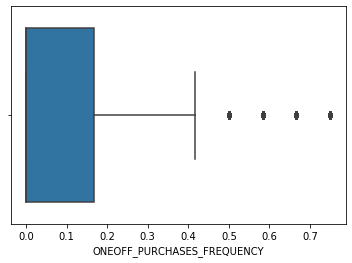

In [28]:
sns.boxplot(df['ONEOFF_PURCHASES_FREQUENCY'])

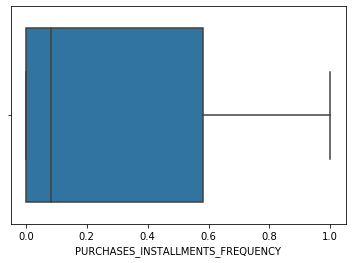

In [29]:
sns.boxplot(df['PURCHASES_INSTALLMENTS_FREQUENCY'])

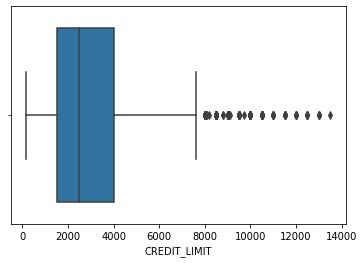

In [30]:
sns.boxplot(df['CREDIT_LIMIT'])

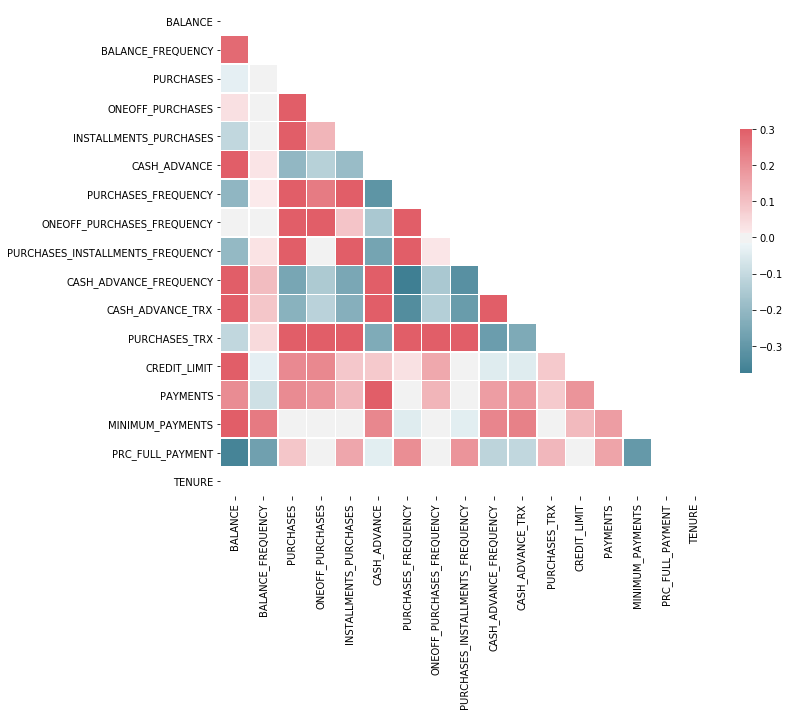

In [31]:
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

KPIs

In [32]:
df.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

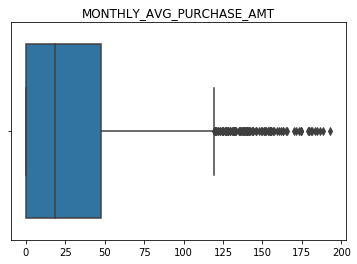

In [33]:
plt.title("MONTHLY_AVG_PURCHASE_AMT")
sns.boxplot(df['PURCHASES']/df['TENURE'])

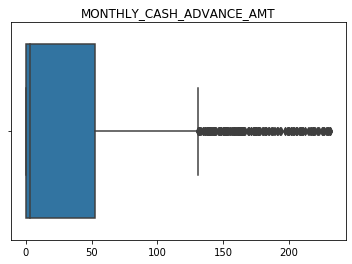

In [34]:
plt.title("MONTHLY_CASH_ADVANCE_AMT")
sns.boxplot(df['CASH_ADVANCE']/df['TENURE'])

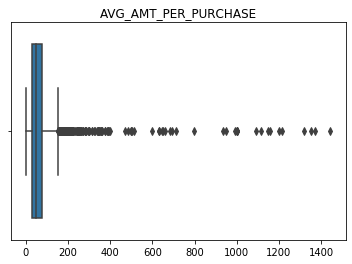

In [35]:
plt.title("AVG_AMT_PER_PURCHASE")
sns.boxplot(df['PURCHASES']/df['PURCHASES_TRX'])

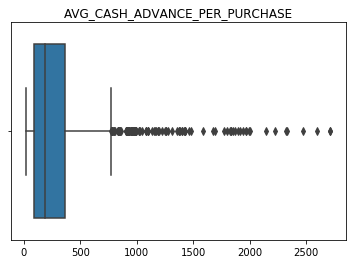

In [36]:
plt.title("AVG_CASH_ADVANCE_PER_PURCHASE")
sns.boxplot(df['CASH_ADVANCE']/df['CASH_ADVANCE_TRX'])

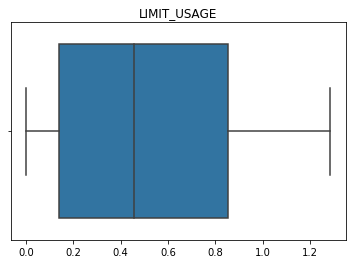

In [37]:
plt.title("LIMIT_USAGE")
sns.boxplot(df['BALANCE']/df['CREDIT_LIMIT'])

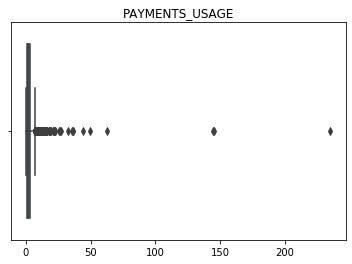

In [38]:
plt.title("PAYMENTS_USAGE")
sns.boxplot(df['PAYMENTS']/df['MINIMUM_PAYMENTS'])

Clustering Analysis

In [39]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_std=pd.DataFrame(scaler.fit_transform(df))

In [40]:
for i in range(len(df.columns)):
    df_std.rename(columns={i:df.columns[i]},inplace=True)

In [41]:
df_std.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-1.132974,-2.601516,-0.632433,-0.601500,-0.316464,-0.642027,-0.605153,-0.666536,-0.582755,-0.795269,-0.733259,-0.639389,-0.905506,-0.880130,-0.940617,-0.415092,0.0
1,-0.374911,0.339842,-0.811387,-0.553358,-0.689420,-0.642027,-0.828930,-0.184397,-0.805388,-0.795269,-0.733259,-0.752641,-0.823006,-0.196194,-0.634748,-0.415092,0.0
2,0.606746,0.339842,0.135668,-0.601500,1.015856,-0.642027,1.632603,-0.666536,1.866215,-0.795269,-0.733259,0.493139,-0.369261,-0.195146,0.199764,-0.415092,0.0
3,-0.182459,0.339842,1.094195,1.388850,0.092458,-0.642027,-0.157603,-0.184397,-0.137487,-0.795269,-0.733259,-0.299630,1.569468,-0.181923,-0.439596,-0.415092,0.0
4,1.532956,0.339842,-0.847448,-0.601500,-0.689420,-0.108684,-1.052705,-0.666536,-0.805388,-0.142171,-0.320844,-0.865894,-0.080514,-0.013470,1.530163,-0.415092,0.0


In [42]:
from sklearn.decomposition import FactorAnalysis

In [43]:
transformer = FactorAnalysis(n_components=10, random_state=0)

In [44]:
transformer.fit(df_std)

FactorAnalysis(copy=True, iterated_power=3, max_iter=1000, n_components=10,
               noise_variance_init=None, random_state=0,
               svd_method='randomized', tol=0.01)

In [45]:
components_df=pd.DataFrame(transformer.components_)
for i in range(len(df.columns)):
    components_df.rename(columns={i:df.columns[i]},inplace=True)

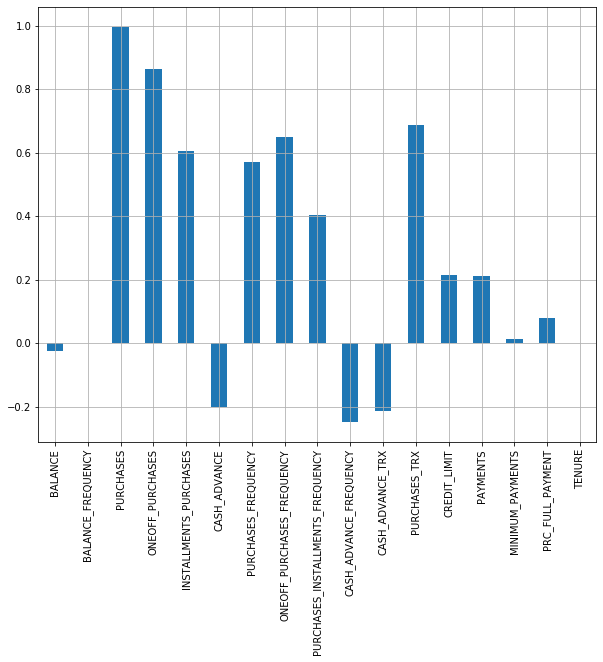

In [46]:
plt.figure(figsize=(10,8))
components_df.loc[0].plot(kind="bar")
plt.grid(True)

In [47]:
components_df.loc[0].sort_values()

CASH_ADVANCE_FREQUENCY             -0.248568
CASH_ADVANCE_TRX                   -0.214977
CASH_ADVANCE                       -0.199806
BALANCE                            -0.025506
TENURE                             -0.000000
BALANCE_FREQUENCY                   0.001609
MINIMUM_PAYMENTS                    0.013869
PRC_FULL_PAYMENT                    0.079183
PAYMENTS                            0.210395
CREDIT_LIMIT                        0.215486
PURCHASES_INSTALLMENTS_FREQUENCY    0.402919
PURCHASES_FREQUENCY                 0.569656
INSTALLMENTS_PURCHASES              0.606326
ONEOFF_PURCHASES_FREQUENCY          0.649062
PURCHASES_TRX                       0.687207
ONEOFF_PURCHASES                    0.863917
PURCHASES                           0.996624
Name: 0, dtype: float64

In [48]:
cluster_df=df[['PURCHASES','ONEOFF_PURCHASES','PURCHASES_TRX','ONEOFF_PURCHASES_FREQUENCY','INSTALLMENTS_PURCHASES','PURCHASES_FREQUENCY','PURCHASES_INSTALLMENTS_FREQUENCY','CREDIT_LIMIT','PAYMENTS','CASH_ADVANCE_FREQUENCY']]

In [49]:
cluster_df.head()

,PURCHASES,ONEOFF_PURCHASES,PURCHASES_TRX,ONEOFF_PURCHASES_FREQUENCY,INSTALLMENTS_PURCHASES,PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CREDIT_LIMIT,PAYMENTS,CASH_ADVANCE_FREQUENCY
0,95.40,0.00,2,0.000000,95.4,0.166667,0.083333,1000.0,201.802084,0.000000
4,16.00,16.00,1,0.083333,0.0,0.083333,0.000000,1200.0,678.334763,0.000000
7,436.20,0.00,12,0.000000,436.2,1.000000,1.000000,2300.0,679.065082,0.000000
8,861.49,661.49,5,0.083333,200.0,0.333333,0.250000,7000.0,688.278568,0.000000
14,0.00,0.00,0,0.000000,0.0,0.000000,0.000000,3000.0,805.647974,0.083333


In [50]:
from sklearn.cluster import KMeans
import sklearn.cluster as cluster
import time

In [51]:
distortions = []
K = range(1,6)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(cluster_df)
    distortions.append(kmeanModel.inertia_)

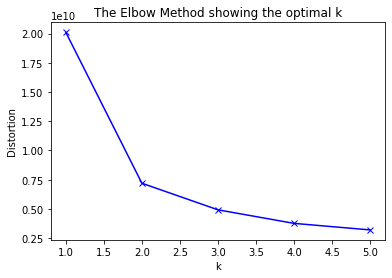

In [52]:
# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

Therefore optimal k=2

In [53]:
km = KMeans(init="random", n_clusters=2)
km.fit(cluster_df)

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300, n_clusters=2,
       n_init=10, n_jobs=None, precompute_distances='auto', random_state=None,
       tol=0.0001, verbose=0)

In [54]:
labels=km.labels_

In [55]:
labels=labels.tolist()

In [56]:
labels=pd.Series(data=labels,index=range(len(labels)))

In [57]:
labels_x=list() #Extracting the various clusters formed
for i in range(10):
    labels_x.append(labels[labels.values==i])


Cluster 1

In [58]:
cluster_df.iloc[labels_x[0].index,:].describe().T

,count,mean,std,min,25%,50%,75%,max
PURCHASES,2347.0,334.478965,403.064274,0.0,0.000000,190.960000,525.520000,2315.860000
ONEOFF_PURCHASES,2347.0,169.384389,306.221639,0.0,0.000000,0.000000,205.500000,1440.140000
PURCHASES_TRX,2347.0,7.313166,8.548463,0.0,0.000000,4.000000,12.000000,41.000000
ONEOFF_PURCHASES_FREQUENCY,2347.0,0.103323,0.166008,0.0,0.000000,0.000000,0.166667,0.750000
INSTALLMENTS_PURCHASES,2347.0,165.294095,241.039934,0.0,0.000000,0.000000,277.370000,1166.680000
PURCHASES_FREQUENCY,2347.0,0.385634,0.376521,0.0,0.000000,0.250000,0.750000,1.000000
PURCHASES_INSTALLMENTS_FREQUENCY,2347.0,0.301733,0.378223,0.0,0.000000,0.000000,0.583333,1.000000
CREDIT_LIMIT,2347.0,2112.590541,1020.891210,150.0,1200.000000,1800.000000,3000.000000,4600.000000
PAYMENTS,2347.0,762.158607,674.167249,0.0,327.061057,554.325638,938.760527,4138.243604
CASH_ADVANCE_FREQUENCY,2347.0,0.105489,0.127318,0.0,0.000000,0.083333,0.166667,0.500000


In [59]:
cluster0_data=cluster_df.iloc[labels_x[0].index,:]

Cluster 2

In [60]:
cluster_df.iloc[labels_x[1].index,:].describe().T

,count,mean,std,min,25%,50%,75%,max
PURCHASES,639.0,528.528169,542.524917,0.0,70.280000,354.920000,849.955000,2260.410000
ONEOFF_PURCHASES,639.0,312.017950,395.138593,0.0,0.000000,124.510000,517.800000,1443.330000
PURCHASES_TRX,639.0,8.866980,9.710197,0.0,1.000000,6.000000,13.000000,41.000000
ONEOFF_PURCHASES_FREQUENCY,639.0,0.158842,0.189879,0.0,0.000000,0.083333,0.250000,0.750000
INSTALLMENTS_PURCHASES,639.0,216.956150,300.815322,0.0,0.000000,56.000000,359.340000,1170.490000
PURCHASES_FREQUENCY,639.0,0.415493,0.356449,0.0,0.083333,0.333333,0.750000,1.000000
PURCHASES_INSTALLMENTS_FREQUENCY,639.0,0.300469,0.360151,0.0,0.000000,0.083333,0.583333,1.000000
CREDIT_LIMIT,639.0,7171.489543,1877.921402,4500.0,6000.000000,6600.000000,8500.000000,13500.000000
PAYMENTS,639.0,1009.238956,743.485162,0.0,540.665279,837.844106,1235.219803,4119.519203
CASH_ADVANCE_FREQUENCY,639.0,0.086724,0.127732,0.0,0.000000,0.000000,0.166667,0.500000
